# Variables de estado discretas

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Estado de un sistema

### Variables auxiliares como descripción del estado de un sistema

Tal como hemos visto, un sistema LTI discreto puede ser caracterizado por su respuesta al impulso, así como también mediante la ecuación de diferencias que los describe y sus condiciones iniciales. 

Pero también el sistema puede ser descrito mediante variables auxiliares. La siguiente figura muestra el diagrama de bloques de un sistema de orden $N$ utilizando retrasos en [forma directa II](./30-Diagramas_de_flujo_discretos.ipynb#formaDirectaII).

<img width="400" src="images/directaII.png">


Observando el diagrama, podríamos utilizar las salidas de los retrasos como variables que describan el *estado* del sistema. 

De esta manera, cada par de variables de estado se describe por una ecuación de diferncias de primer orden. En vez de resolver un sistema de orden N, se resuelven N sistemas de primer orden.

### Definición de estado
<div class="alert alert-block alert-info">
Se puede definir el estado de un sistema como la mínima cantidad de información que es suficiente para determinar la salida, suponiendo que se conoce la entrada para un cierto intervalo de la variable independiente $n$. Esta definición aplica sólo para sistemas causales.
</div>

Ventajas de esta representación:
- Proporciona interpretaciones sobre el comportamiento del sistema que los otros métodos no puede proveer
- Se puede adaptar fácilmente en computadores
- Se puede extender a sistemas no lineales o variantes
- Permite manejar múltiples entradas y salidas

## Respuesta a estado cero y a entrada cero

Un sistema está en estado cero en $n_0$ si, cuando no hay entrada, las variables de estado son cero en $n_0$ y permanecen así para $n>n0$.

Si un sistema está en estado cero en $n=0$ y se aplica una entrada causal, la respuesta resultante se denomina ***respuesta a estado cero*** $y_{os}$.

Si un sistema no está en estado cero en $n=0$ y si no se aplica una entrada, la respuesta resultante se denomina ***respuesta a entrada cero*** $y_{oi}$.

<img src="images/osoi_discreto.png" width="400" /> 

La respuesta total de un sistema lineal, que no está en estado cero, a una entrada causal, es la suma de la respuesta a entrada cero y la respuesta a estado cero.

$$ y[n] = y_{os}(t) + y_{oi}[n] $$

<img src="images/respuesta_total_discreta.png" width="500" /> 


***
## Variables de estado

Un sistema LTI con entrada $f[n]$ y salida $g[n]$ puede describirse mediante sus ecuaciones de estado.

Consideremos la siguiente ecuación diferencial de segundo orden:

$$ g[n] = -a_1g[n-1] - a_2g[n-2] + b_0f[n] $$

Definimos las variables de estado de la siguiente forma:

$$v_1[n] = g[n-2]$$ 

y

$$v_2[n] = g[n-1]$$

Esta forma es equivalente a escoger las salidas de los integradores como las variables de estado. En forma matricial, podemos formular el problema de la siguiente manera:

\begin{equation}
\begin{bmatrix} v_1[n+1] \\ v_2[n+1]
\end{bmatrix} = 
\begin{bmatrix} 0 & 1 \\ -a_2 & -a_1
\end{bmatrix}
\begin{bmatrix} v_1[n] \\ v_2[n]
\end{bmatrix} +
\begin{bmatrix} 0 \\ b_0
\end{bmatrix} f[n]
\end{equation}


\begin{equation}
g[n] = 
\begin{bmatrix} -a_2 & -a_1 
\end{bmatrix}
\begin{bmatrix} v_1[n] \\ v_2[n]
\end{bmatrix}
\end{equation}


### Formulación general

Pasa el caso genérico, podemos escribir de forma más compacta:

$$ \mathbf{v}[n+1] = \mathbf{A}\mathbf{v}[n] + \mathbf{b}f[n] $$

$$ g[n] = \mathbf{c}\mathbf{v}[n] + df[n] $$

<div class="alert alert-block alert-info">
El vector $\mathbf{v}[n]$ almacena la historia del sistema y se denomina vector de estado. La segunda ecuación se denomina ecuación de salida.
</div>

### Cálculo de la solución

En este caso tenemos:
$$ \mathbf{v}[n+1] = \mathbf{A}\mathbf{v}[n] + \mathbf{b}f[n]  $$

con

$$  \mathbf{v[0]} = \mathbf{v}_0$$

La solución para $n=0$ es:

$$ \mathbf{v}[1] = \mathbf{A}\mathbf{v}_0  + \mathbf{b}f[0] $$

La solución para $n=1$ es:

$$ \mathbf{v}[2] = \mathbf{A}\mathbf{v}[1]  + \mathbf{b}f[1] = \mathbf{A}\{\mathbf{A}\mathbf{v}_0 + \mathbf{b}f[0]\} + \mathbf{b}f[1]  = \mathbf{A}^2\mathbf{v}_0 + \mathbf{A}\mathbf{b}f[0]\} + \mathbf{b}f[1] $$


La solución para $n$ se puede encontrar siguiendo el mismo razonamiento:

$$ \mathbf{v}[n] = \mathbf{A}^n\mathbf{v}_0 + \mathbf{A}^{n-1}\mathbf{b}f[0] + \cdots + \mathbf{b}f[n-1] $$

Para calcular esta solución vemos que es necesario calcular la matriz $\mathbf{A}^{n}$.

### Matriz de transición de estados
Definamos 

$$ \mathbf{\Phi[n]} = \mathbf{A}^{n}$$

Esta matriz se conoce como la *matriz de transición de estados*. Esta matriz tiene las siguientes propiedades:

**Propiedad de transición**

$$ \mathbf{\Phi[n-\kappa]} = \mathbf{\Phi[n-j]}\mathbf{\Phi[j-\kappa]} $$

**Propiedad de inversión**

$$ \mathbf{\Phi[n]^{-1}} = \mathbf{\Phi[n]} $$

Además, se tiene que

$$ \mathbf{\Phi[0]} = \mathbf{I} $$


El cálculo de la matriz de transición de estados puede realizarse en forma exacta mediante el [Teorema de Cayley-Hamilton](https://en.wikipedia.org/wiki/Cayley%E2%80%93Hamilton_theorem).

### Solución a la ecuación de estado
La ecuación de estado general es:

$$ \mathbf{v}[n+1] = \mathbf{A}\mathbf{v}[n] + \mathbf{b}f[n] $$

La solución general es

$$ \mathbf{v}[n] = \mathbf{\Phi[n-n_0]}\mathbf{v}_0 + \sum_{j=n_0}^{n-1}\mathbf{\Phi[n-1-j]}\mathbf{b}f[j] $$

### Cálculo de la salida mediante la ecuación de salida
La ecuación de salida es:
$$ g[n] = \mathbf{c}\mathbf{v}[n] + df[n] $$

Utilizando la solución general de la ecuación de estado, podemos reemplazar y obtenemos:

$$ g[n] = \mathbf{c}\mathbf{\Phi[n-n_0]}\mathbf{v}_0 + \sum_{j=n_0}^{n-1}\mathbf{c}\mathbf{\Phi[n-1-j]}\mathbf{b}f[j] + df[n] $$

Observamos que la suma tiene la forma de una convolución con la matriz de transición de estados. Entonces:

$$ g[n] = \underbrace{\mathbf{c}\mathbf{\Phi[n-n_0]}\mathbf{v}_0}_\text{Respuesta a entrada cero} + \underbrace{\{\mathbf{c}\mathbf{\Phi[n-1]} \ast \mathbf{b}f[n]\} + df[n]}_\text{Respuesta a estado cero} $$

El término $\mathbf{c}\mathbf{\Phi[n-n_0]}\mathbf{v}_0$ es la respuesta a entrada cero, mientras que el término $\{\mathbf{c}\mathbf{\Phi[n-1]} \ast \mathbf{b}f[n]\} + df[n]$ es la respuesta a estado cero.  


***
## Ejemplo:

Consideremos el sistema descrito por:

$$ g[n] - 1.5 g[n-1] + 0.8g[n-2] = f[n] $$

con condiciones iniciales $g[-1] = 1$ y $g[-2] = 1$

Reacomodando la ecuación, tenemos: 

$$ g[n] = 1.5g[n-1] + 0.8g[n] + f[n] $$


En forma matricial, la formulación es:


\begin{equation}
\begin{bmatrix} v_1[n+1] \\ v_2[n+1]
\end{bmatrix} = 
\begin{bmatrix} 0 & 1 \\ -0.8 & 1.5
\end{bmatrix}
\begin{bmatrix} v_1(x) \\ v_2(x)
\end{bmatrix} +
\begin{bmatrix} 0 \\ 1
\end{bmatrix} f(x)
\end{equation}


\begin{equation}
g[n] = 
\begin{bmatrix} -0.8 & 1.5 
\end{bmatrix}
\begin{bmatrix} v_1(x) \\ v_2(x)
\end{bmatrix}
\end{equation}

Tenemos entonces que 


\begin{equation}
\mathbf{A} = 
\begin{bmatrix} 0 & 1 \\ -0.8 & 1.5
\end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{b} = 
\begin{bmatrix} 0 \\ 1
\end{bmatrix}
\end{equation}

\begin{equation}
\mathbf{c} = 
\begin{bmatrix} -0.8 & 1.5 
\end{bmatrix}
\end{equation}

y 

$$d=1$$

El siguiente código calcula la salida a entrada cero, es decir cuando $f[n] = 0$

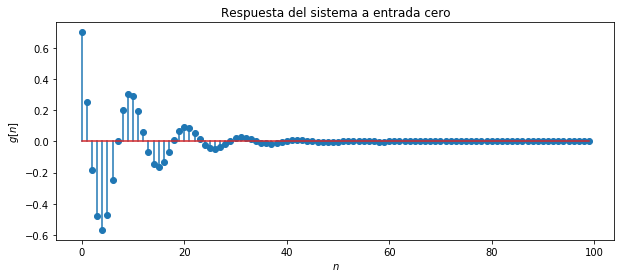

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

%matplotlib inline


A = np.array([[0,1], [-0.8, 1.5]])
c = np.array([[-0.8,1.5]])

v0 = np.array([[1], [1]])

n0 = 0


g = []
samples = []
n = 0
for i in range(100):
    v = np.dot(matrix_power(A,(n-n0)),v0)
    out = np.dot(c,v).item()
    g.append(out)
    samples.append(n)
    n+=1

plt.figure(figsize=(10, 4))
plt.stem(samples,g)
plt.xlabel('$n$')
plt.ylabel('$g[n]$')
plt.title('Respuesta del sistema a entrada cero')
plt.show()



<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>